<br></br>
1. 차원축소의 3가지 접근법
  - 피처선택(Feature Selection) : '누구를 차원축소할 것인가' 불필요한 피처를 버린다 상관계수 값을 통해 판단한다
  - 피처추출(Feature Extraction) : 피처를 선택하는 것이 아니라 더 작은 차원으로 맵핑하는 것 (=차원축소)
    : PCA, LDA, SVD, NMF 등
  - 피처생성(Feature Engineering) : 특성공학, 데이터 테이블에 피처가 부족한 상황일 때 적용하는 기법
  <br></br>
2. PCA
  - 가장 대표적인 차원 축소 알고리즘이다
  - 여러 피처간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 자원을 축소한다
  - PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축을 이용해서 차원을 축소한다. 이것이 PCA의 주성분이 된다
<br></br>
3. PCA 수행과정
  - 입력 데이터 세트의 공분산 행렬을 생성한다
  - 공분산 행렬의 고유벡터와 고유값을 계산한다
  - 고유값이 가장 큰 순으로 k개(PCA의 변환 차수)만큼 고유벡터를 추출한다
  - 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다
 <br></br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set(font='malgun gothic', rc={'axes.unicode_minus':False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [6]:
from sklearn.datasets import load_iris

X,y = load_iris(True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
type(X)

numpy.ndarray

In [9]:
iris = load_iris()
iris.feature_names
# 이름 사이에 공백을 없애고 (cm)를 없애고 싶음

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# 이름을 바꾸고 데이터프레임으로 변환
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target
# unique함수로 타겟 파악하는 과정 생략
# target컬럼을 'target'데이터프레임에 집어넣기

iris_df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]>

## 각 클래스별 데이터 분포 시각화

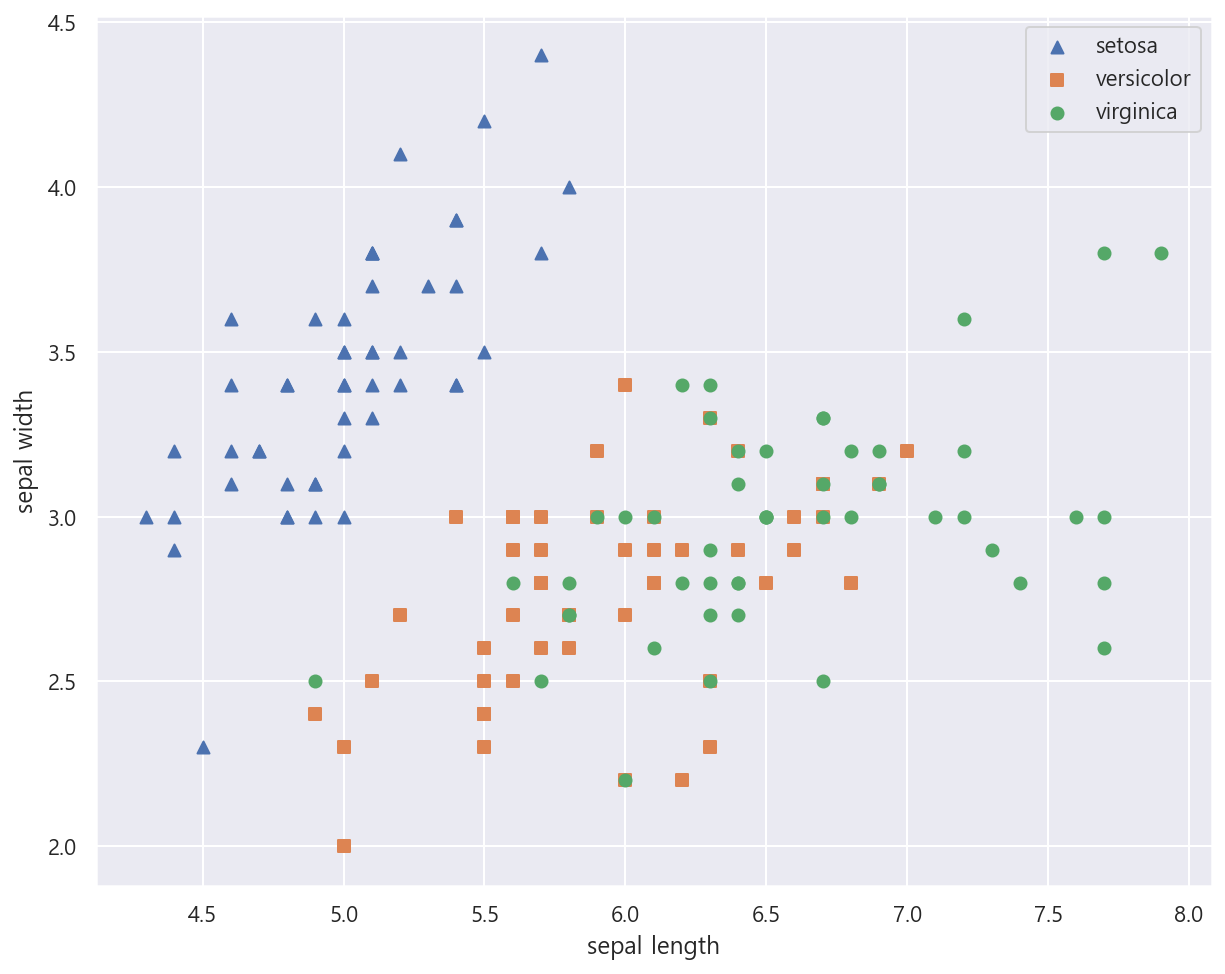

In [11]:
markers = ['^', 's', 'o']
# 세모, 사각형, 원형

# 반복해서 그릴거라 반복문 사용
# i : index
# 0 : setosa
# 1 : vesicolor
# 2 : virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    # index과 같은 품종의 sepal_length를 그릴것
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label =iris.target_names[i])
    
plt.legend()
# 옵션 안줘도 디폴트가 loc=best
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# 각각의 점에다가 라벨링을 함
plt.show()

# 와 시각화 넘 귀엽다

vesicolor와 virginica를 골라내는게 어렵겟다</br>
주성분 분석을 통해 차원을 분리(?)해보자

## 전처리 - 피처 스케일링
- PCA는 여러 피처값을 연산하기에 스케일에 영향을 많이 받는다
- 그래서 PCA 적용 전에 피처 스케일링 작업이 필요하다

In [14]:
from sklearn.preprocessing import StandardScaler

# 타켓값을 제외한 피처 추출
iris_df_input = iris_df.iloc[:, :-1]
# 스탠다드 스케일링
iris_scaled = StandardScaler().fit_transform(iris_df_input)
# 이걸 이용해서 데이터프레임을 만들거임
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = iris_df.target
iris_scaled_df.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [15]:
iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])
# 위의 네줄을 한줄로 작성할수있다

## 주성분 분석을 통해 차원축소

In [17]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
# 4차원을 2차원으로 축소
pca = PCA(n_components = 2)

# 스케일 데이터 -> PCA 변환 데이터
pca.fit(iris_f_scaled)
iris_pca = pca.transform(iris_f_scaled)

# 변환 후 차원 추출
print(f'스케일 데이터 : {iris_f_scaled.shape}')
print(f'PCA 변환 데이터 : {iris_pca.shape}')
# 2차원으로 변한게 보임

스케일 데이터 : (150, 4)
PCA 변환 데이터 : (150, 2)


In [18]:
# PCA 데이터 프레임 생성
pca_columns = ['pca_component_1', 'pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target

iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


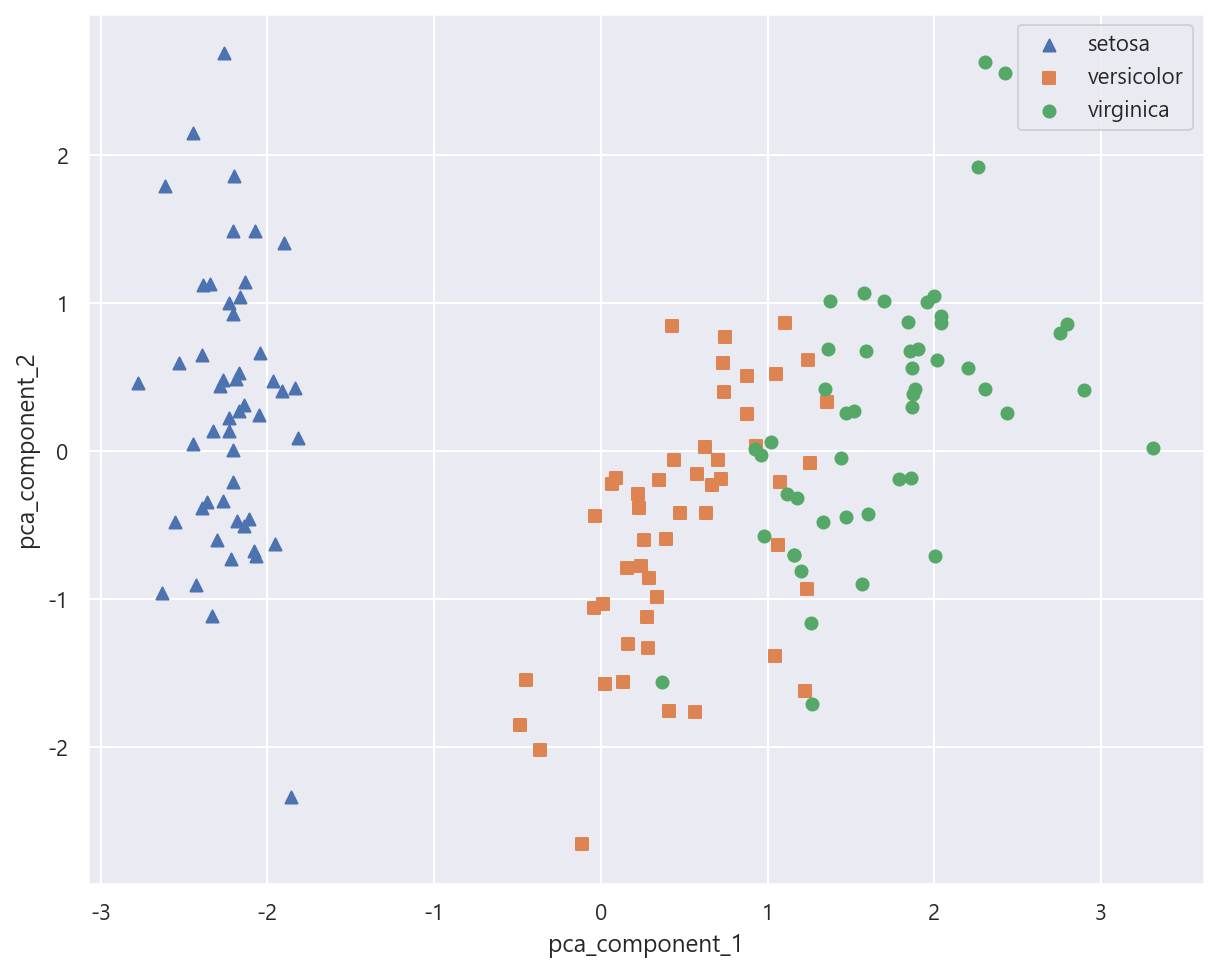

In [19]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df['target'] == i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label =iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 차원축소한 데이터도 시각화해봄
# pca_component_1 -> versicolor와 virginica 아까보단 구분이 됨
# pca_component_2 -> 그닥 구분이 잘 되진 않음

In [20]:
# component 변동성이 반영된 변동 비율
# pca : 방금 만든 모델
# explained_variance_ratio_ 속성 : 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율
pca.explained_variance_ratio_
# pca_component_1는 72.9%만큼 분류(구분)할 수 있다는 뜻
# pca_component_2는 22.8%만큼 분류할 수 있다는 뜻
# 둘을 합치면 95%정도 분류할 수 있다

array([0.72962445, 0.22850762])

## PCA 변환 전/후 분류

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# PCA 변환 전
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
scores = cross_val_score(rcf, iris_df.iloc[:, :-1],
                         iris_df.target, scoring='accuracy', cv = 3)

# 정확도
print(f'원본 데이터 fold별 정확도 : {scores}')
print(f'원본 데이터 평균 정확도 : {np.mean(scores) : .4f}')

# 98, 94, 96 나쁘진 않음

원본 데이터 fold별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 :  0.9600


In [23]:
# PCA 변환 후
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
pca_scores = cross_val_score(rcf, iris_df_pca.iloc[:, :-1],
                         iris_df_pca.target, scoring='accuracy', cv = 3)

# 정확도
print(f'원본 데이터 fold별 정확도 : {pca_scores}')
print(f'원본 데이터 평균 정확도 : {np.mean(pca_scores) : .4f}')

# 차원 축소됐기 때문에 예측 성능이 떨어지는건 감안해야 함
# 속성 네개를 두개로 감소했다는거치고는 원본 데이터의 속성은 잘 유지했다는 것
# 차원을 축소할지 말지 판단은 분석가가 하는 것

원본 데이터 fold별 정확도 : [0.88 0.88 0.9 ]
원본 데이터 평균 정확도 :  0.8867


409쪽 참고

# UCI 신용카드 고객 데이터

In [25]:
# 첫 행 제거, ID제거
# 시트가 여러개 일 때 sheet_name
# axis = 1축
df = pd.read_excel('C:/k_digital/data/defaultofcreditcardclients.xls', header=1, sheet_name='Data').drop('ID', axis=1)

In [26]:
df.shape

(30000, 24)

In [27]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


- target : default ~ : 다음달 연체 여부를 의미(-1 : 정상, 1 : 연체)
- PAY_0 → PAY_1

In [29]:
# 컬럼명 변경
df.rename(columns = {'PAT_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
# inplace=True 는 변수에 안담고 바로 원본을 변경할때

In [31]:
X_features = df.drop('default', axis=1)
y_target = df['default']

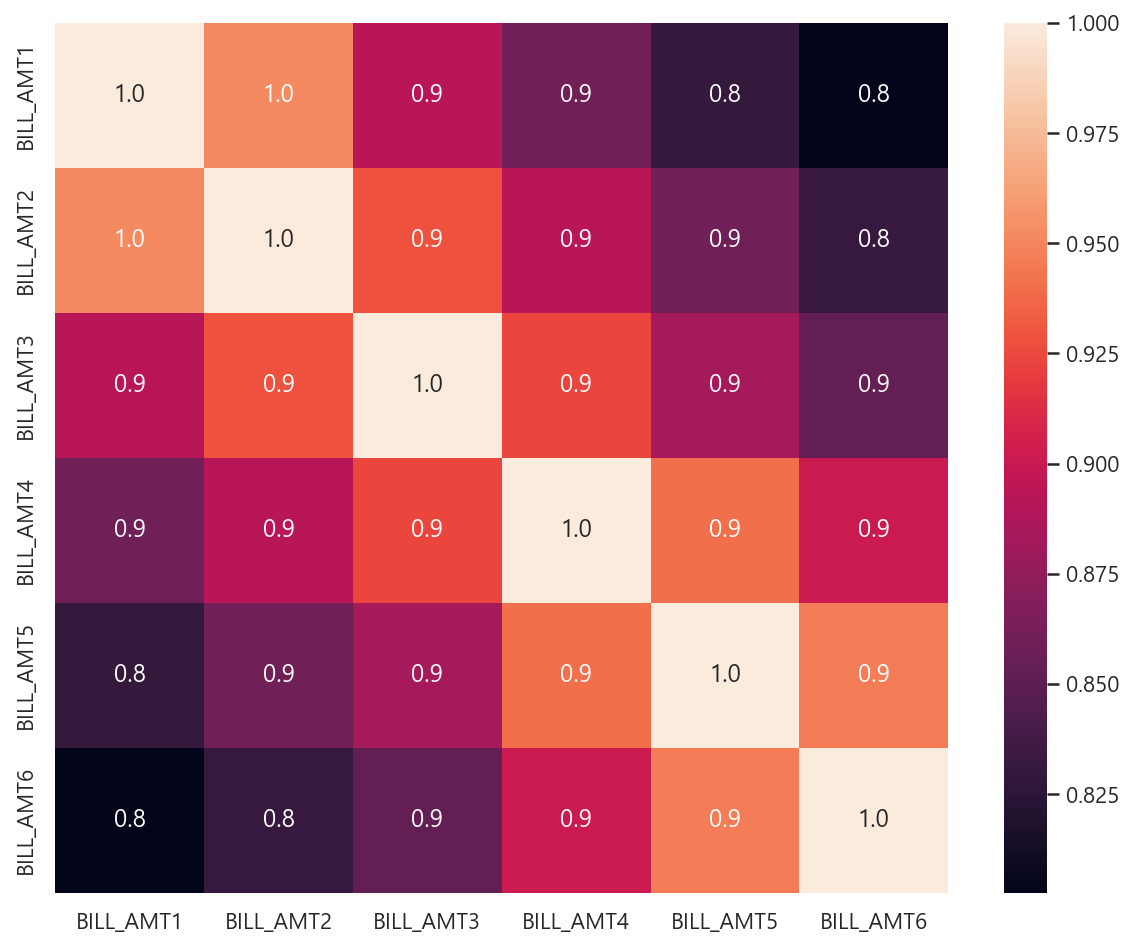

In [33]:
# 컬럼 BILL_AMT1 ~ BILL_AMT6
# 피처선택 : 불필요한 피처를 제거하려고
# 불필요 여부 판단은 상관계수 값을 참고
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
# i : 리스트내포 쓰려고
# BILL_AMT : 빌린돈 총합

# 피처 상관관계
# corr = X_feature.corr()
corr = X_features[cols_bill].corr()

# 히트맵으로 시각화
sns.heatmap(corr,
           annot=True,
           fmt='.1f')
plt.show()
# 상관관계가 0.8부터 시작.. 굉장히 높다
# 다중공선성..?

In [35]:
# 피처 스케일링
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# 차원축소 = 2개로
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)

# 변동비율 확인
print('PCA Component별 변동성 :', pca.explained_variance_ratio_)
# 첫번째 두번째 각각 90% 5% 정도 반영
# 합치면 전체데이터의 95%정도 반영한다는 것.. 괜찮네

PCA Component별 변동성 : [0.90555253 0.0509867 ]


## PCA 변환 전 성능

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 피처 스케일링
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

#차원 축소 = 2
pca = PCA(n_components =2)
pca.fit(df_cols_scaled)

#변동 비율
print('PCA Components별 변동성', pca.explained_variance_ratio_)

#결과 PCA Components별 변동성 [0.90555253 0.0509867 ]
##단 2개의 PCA 컴포넌트로 6개의 변동성을 약95%상관도가 높다.

PCA Components별 변동성 [0.90555253 0.0509867 ]


## PCA 변환 후 성능

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 피처 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA n - 6
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)

# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=2022)

# 교차검증
pca_scores = cross_val_score(rcf, df_pca, y_target,
                             scoring='accuracy', cv = 3)

# 정확도
print(f'PCA 데이터 fold별 정확도 : {pca_scores}')
print(f'PCA 데이터 평균 정확도 : {np.mean(pca_scores) : .4f}')

PCA 데이터 fold별 정확도 : [0.7915 0.7978 0.8009]
PCA 데이터 평균 정확도 :  0.7967


머신러닝은 기준이 없음. 어디까지라는건 우리의 선택일 뿐</br>
최선의 모델을 찾는 방법은 다양한 모델을 다뤄보는 것</br>
나한테 맞는 내가 잘 다룰 수 있는 모델을 알아야.. 그걸로 먹고사는거래</br>
그리고 책좀읽으래